In [2]:
import csv

from google.cloud import bigquery
from google.cloud.bigquery import SchemaField

In [3]:
client = bigquery.Client()

# Perform a synchronous query.
TIMEOUT_MS = 5000
QUERY = (
    'SELECT name FROM [bigquery-public-data:usa_names.usa_1910_2013] '
    'WHERE state = "TX"')
query = client.run_sync_query('%s LIMIT 5' % QUERY)
query.timeout_ms = TIMEOUT_MS
query.run()

for row in query.rows:
    print(row)

('Ruby',)
('Annie',)
('Thelma',)
('Ethel',)
('Opal',)


In [533]:
client = bigquery.Client()

# Perform a synchronous query.
TIMEOUT_MS = 50000
QUERY = (
    'SELECT name FROM [bigquery-public-data:usa_names.usa_1910_2013] '
    'WHERE state = "TX"')
query = client.run_sync_query('%s LIMIT 50' % QUERY)
query.timeout_ms = TIMEOUT_MS
query.run()

for row in query.rows:
    print(row)

('Ruby',)
('Annie',)
('Thelma',)
('Ethel',)
('Opal',)
('Emma',)
('Grace',)
('Hattie',)
('Lena',)
('Jewel',)
('Anita',)
('Lucile',)
('Nora',)
('Mamie',)
('Carmen',)
('Francisca',)
('Elvira',)
('Eleanor',)
('Maudie',)
('Josefa',)
('Lila',)
('Callie',)
('Floy',)
('Concepcion',)
('Bennie',)
('Hilda',)
('Marian',)
('Luella',)
('Erna',)
('Geraldine',)
('Peggy',)
('Claudia',)
('Jackie',)
('Santos',)
('Bobbie',)
('Jannie',)
('Emilia',)
('Joe',)
('Herlinda',)
('Hettie',)
('Madeline',)
('Veda',)
('Vlasta',)
('Catarina',)
('Genoveva',)
('Dolly',)
('Jesusita',)
('Lona',)
('Ocie',)
('Sibyl',)


In [5]:
import pandas as pd
# import CSV of some manually selected cryptocurrency subreddits

#subreddit_list = pd.read_csv('subreddit_list.csv', header=None)


import csv
with open('subreddit_list.csv', 'rt') as f:
    reader = csv.reader(f)
    subreddit_list = list(reader)



In [6]:
# get the counts from many tables
client = bigquery.Client()



# Perform a synchronous query.
TIMEOUT_MS = 50000
# QUERY = ('SELECT COUNT(*) comments, subreddit '
# 'FROM [insight-179218:reddit_comments.2016_05] '
# 'GROUP by 2 '
# 'ORDER BY 1 DESC ')

QUERY = """
    SELECT COUNT(*) comments, subreddit
    FROM [grand-nimbus-179705:reddit_comments.2016_05]
    WHERE subreddit='ethtrader'
    GROUP by 2
    ORDER BY 1 DESC
"""

print(QUERY)
query = client.run_sync_query('%s LIMIT 15' % QUERY)
query.timeout_ms = TIMEOUT_MS
query.run()

for row in query.rows:
    print(row)


    SELECT COUNT(*) comments, subreddit
    FROM [grand-nimbus-179705:reddit_comments.2016_05]
    WHERE subreddit='ethtrader'
    GROUP by 2
    ORDER BY 1 DESC

(20322, 'ethtrader')


In [4]:
# get the counts from many tables
client = bigquery.Client.from_service_account_json(
        '/Users/aaaa/insight_project/chicagoproject.json')

# Perform a synchronous query.
TIMEOUT_MS = 50000



# generate a list of subreddits for the IN SQL statement

subr_SQL = ''

for subreddit_string in subreddit_list:
    subr_SQL = subr_SQL + "'{}', ".format(subreddit_string[0])
subr_SQL = subr_SQL[:-2]    
#print(subr_SQL)


post_data_list = []

for month_string in month_list:
    QUERY = """
            SELECT COUNT(*) comments, subreddit
            FROM [grand-nimbus-179705:reddit_comments.{}]
            WHERE subreddit in ({})
            GROUP BY 2
            ORDER BY 1 DESC""".format(month_string, subr_SQL)
    
    #print(QUERY)
    #print(month_string)
    query = client.run_sync_query('%s LIMIT 150' % QUERY)
    query.timeout_ms = TIMEOUT_MS
    query.run()

    for row in query.rows:
        #print('--'+ row[1] + ': ' + str(row[0]))
        post_data_list.append([month_string, row[1], row[0]])
        
print(post_data_list)

NameError: name 'subreddit_list' is not defined

In [100]:
print(subreddit_list)

[['ethtrader'], ['btc'], ['ethereum'], ['BitcoinAll'], ['Bitcoin'], ['Monero'], ['xmrtrader'], ['ethtrader'], ['CryptoCurrency'], ['MoneroMining'], ['BitcoinMarkets'], ['litecoin'], ['ETHInsider'], ['CryptoBugs'], ['Aeon'], ['Ripple'], ['ikeo'], ['LitecoinMarkets'], ['BitcoinAll'], ['BytecoinBCN'], ['EtherMining'], ['siacoin'], ['dashpay'], ['moneromarket'], ['PoloniexForum'], ['GenesisMining'], ['NiceHash'], ['MoneroMarketing'], ['dogecoin'], ['CryptoCurrencies'], ['BitcoinMining'], ['CoinBase'], ['Buttcoin'], ['moonero'], ['EtherMining'], ['ethtraderpro'], ['gridcoin'], ['Antshares'], ['gpumining'], ['LitecoinMarkets'], ['altcoin'], ['zec'], ['vergecurrency'], ['burstcoin'], ['shapeshiftio'], ['filecoin'], ['Zcashminers'], ['nvidia'], ['monacoin']]


In [123]:
# prepare a pandas dataframe for my presentation plot
import numpy as np
#dataframe dict

df_dict = []

for subreddit in subreddit_list:
    subr_series_list = []
    
    for month in month_list:
        elem_exists = False
        for elem in post_data_list:
            if elem[0] == month and elem[1] == subreddit[0]:
                elem_exists = True
                found_elem = elem
        if elem_exists:
            subr_series_list.append(found_elem[2])
        else:
            subr_series_list.append(1)
    df_dict.append([subreddit[0], pd.Series(subr_series_list)])
        
#print(dict(df_dict))
df = pd.DataFrame(dict(df_dict))

print(df.head)

<bound method NDFrame.head of     Aeon  Antshares  Bitcoin  BitcoinAll  BitcoinMarkets  BitcoinMining  \
0      1          1   156382           1           18730           1088   
1      1          1   111593           1           10014            756   
2      1          1   110055           1            9417            894   
3      1          1   102787           1            7348            618   
4      1          1   104558           1            7440            600   
5      1          1   103730           1            8213            654   
6      1          1   111071           1           10335            909   
7      1          1    91297        1747           10815            745   
8      1          1    61475        4722            6451            661   
9      1          1    63467        5141           11389            589   
10     1          1    69347        6802           22991            954   
11     1          1    76520        7588           13657            91

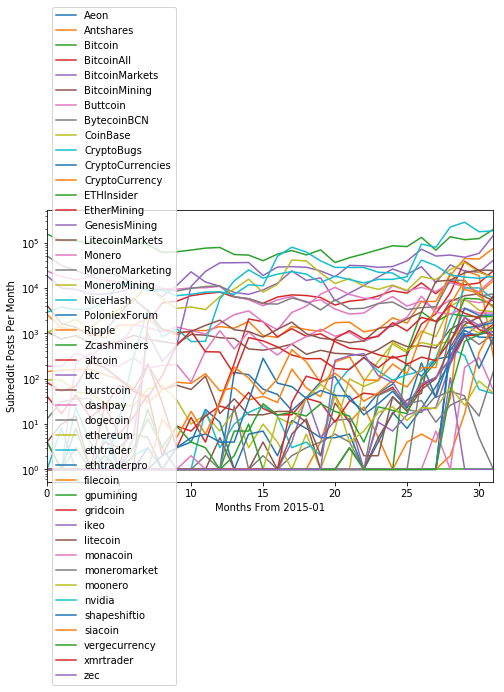

In [130]:
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = (8,5)


ax = df.plot(logy=True)



patches, labels = ax.get_legend_handles_labels()

ax.legend(patches, labels, loc='center left')
ax.set(xlabel = 'Months From 2015-01', ylabel = 'Subreddit Posts Per Month') 
plt.show()

In [ ]:
icodf

In [597]:


print(icodf)

                      Name Open Date (GMT) Close Date (GMT)  \
0                     Opus       7/21/2017        8/24/2017   
1                Paquarium       6/22/2017        8/24/2017   
2                  Agrello       7/16/2017        8/17/2017   
3                  Tierion       7/27/2017        8/10/2017   
4                 Blocktix        7/7/2017         8/7/2017   
5       district0x Network       7/18/2017         8/1/2017   
6              SunContract       6/30/2017         8/1/2017   
7          FundYourselfNow       6/13/2017        7/31/2017   
8                Giga Watt        6/2/2017        7/31/2017   
9                 Blocktix        7/7/2017        7/28/2017   
10             RootProject       7/10/2017        7/28/2017   
11                TrueFlip       6/28/2017        7/28/2017   
12             GeoFounders       6/25/2017        7/26/2017   
13              Primalbase       6/26/2017        7/26/2017   
14                    Dent       7/11/2017        7/26/

In [103]:
# PRAW setup
import praw
# CREATE PRAW OBJECT WITH CREDENTIALS HERE

In [19]:
# use ICO list and PRAW to search for specific subreddits for the coin

for submission in reddit.subreddit('QRL').search('QRL'):
    print(submission.title)

QRL Testnet – The QRL – Medium
QRL Giveaway
Antshares vs QRL?
long-term invest in QRL? What do you think?
Where can i buy QRL?
QRL Update - State of development - Medium
Why is QRL so undervalued
Where can I buy QRL tokens and when?
Quantum Resistant Ledger (QRL) Review
QRL UX/UI Mock-up
Is the QRL team attending the BlueYard x Google Quantum AI Lab: Join us on June 22nd for a Quantum Leap
The new web GUI for QRL
For pre-sale: what is the QRL Allocation & ERC20 option YES/NO?
Why I have decided to invest in Quantum Resistant Ledger (QRL) now • r/CryptoCurrency
First podcast interview with QRL founder Peter Waterland
Why QRL will absorb the market cap of ALL the Top 10 cryptocurrencies (and more)
Should I purchase QRL now?
Does QRL have fungibility?
A message to Jomari Peterson from the QRL community
QRL technical breakthrough today 06/26/17. Anyone with more info?
hold qrl or buy more
Is there any estimated date when QRL will be released to any exchange?
Potential $ value of QRL coins?

In [120]:
from prawcore import NotFound

def sub_exists(sub):
    exists = True
    try:
        reddit.comments.search_by_name(sub, exact=True)
    except NotFound:
        exists = False
    return exists


def find_ico_sub(name, ticker):
    exists = True
    try:
        query = name
        a = reddit.subreddits.search(query)
        ssname = next(a)
    except StopIteration:
        exists = False
    if exists:
        return ssname.display_name
    else:
        return 'none'

def most_common(lst):
    return max(set(lst), key=lst.count)    
    
def find_ico_sub_comments(name, ticker):
    exists = True
    try:
        query = name + ' coin ico'
        print('query is: {}'.format(query))
        a = reddit.subreddit('all').search(query, limit=100, syntax='plain')
        subreddit_list = []
        for ssname in a:
            subreddit_list.append(ssname.subreddit.display_name)
        #print(subreddit_list)
    except StopIteration:
        exists = False
    if len(subreddit_list) > 0:
        #print(subreddit_list)
        return str(most_common(subreddit_list))
    else:
        return 'none'   



# now iterate over the list of ICOs, and fill in if a specific subreddit exists

for iconame in icodf['Name']:
    asset = icodf.loc[icodf['Name'] == iconame, 'Asset']
    sub_existence = find_ico_sub(iconame, asset)
    print('subreddit for {}: {}'.format(iconame, sub_existence))
    if isinstance(sub_existence, str):
        icodf.loc[icodf['Name'] == iconame,'subreddits'] = sub_existence
    else:
        icodf.loc[icodf['Name'] == iconame,'subreddits'] = 'none'

subreddit for Opus: opusfoundation
<class 'str'>
subreddit for Paquarium: none
<class 'str'>
subreddit for Agrello: Agrello
<class 'str'>
subreddit for Tierion: tierion
<class 'str'>
subreddit for Blocktix: blocktix
<class 'str'>
subreddit for district0x Network: district0x
<class 'str'>
subreddit for SunContract: suncontract
<class 'str'>
subreddit for FundYourselfNow: fundyourselfnow
<class 'str'>
subreddit for Giga Watt: none
<class 'str'>
subreddit for Blocktix: blocktix
<class 'str'>
subreddit for RootProject: RootProject
<class 'str'>
subreddit for TrueFlip: trueflip
<class 'str'>
subreddit for GeoFounders: geofounders
<class 'str'>
subreddit for Primalbase: none
<class 'str'>
subreddit for Dent: dent
<class 'str'>
subreddit for Eros: ero
<class 'str'>
subreddit for SkinCoin: SkinCoin
<class 'str'>
subreddit for Gilgam: none
<class 'str'>
subreddit for Gilgam.es: none
<class 'str'>
subreddit for Pillar: projecteternity
<class 'str'>
subreddit for CoinDash: CoinDash
<class 'str'>


subreddit for MaidSafeCoin: MaidSafeCoin
<class 'str'>
subreddit for Counterparty: counterparty
<class 'str'>


In [598]:
# print ico dataframe, and adjust it for specific ICO subreddits manually



icodf.loc[icodf['Name'] == 'Dent','subreddits'] = 'dentcoin'
icodf.loc[icodf['Name'] == 'Dent','Asset'] = 'DENT'

icodf.loc[icodf['Name'] == 'Eros','subreddits'] = 'none'
icodf.loc[icodf['Name'] == 'Eros','Asset'] = 'EROS'

icodf.loc[icodf['Name'] == 'Gilgam.es','Asset'] = 'GGS'

icodf.loc[icodf['Name'] == 'BetKing','Asset'] = 'BKB'

icodf.loc[icodf['Name'] == 'Basic Attention Token','subreddits'] = 'BATProject'

icodf.loc[icodf['Name'] == 'Golem','subreddits'] = 'GolemProject'

icodf.loc[icodf['Name'] == 'Pillar','subreddits'] = 'PillarProject'

icodf.loc[icodf['Name'] == 'Mothership','subreddits'] = 'MothershipExchange'

icodf.loc[icodf['Name'] == 'OnPlace','subreddits'] = 'none'

icodf.loc[icodf['Name'] == 'Polybius','subreddits'] = 'none'

icodf.loc[icodf['Name'] == 'Air','subreddits'] = 'SphreCo'

icodf.loc[icodf['Name'] == '21 Million','subreddits'] = 'none'

icodf.loc[icodf['Name'] == 'Melon','subreddits'] = 'MelonProject'

icodf.loc[icodf['Name'] == 'Civic','subreddits'] = 'CivicPlatform'

icodf.loc[icodf['Name'] == 'Internet of Coins','subreddits'] = 'none'

icodf.loc[icodf['Name'] == 'Aira','subreddits'] = 'none'

icodf.loc[icodf['Name'] == 'Mysterium Network','subreddits'] = 'MysteriumNetwork'

icodf.loc[icodf['Name'] == 'Metal','subreddits'] = 'MetalPay'

icodf.loc[icodf['Name'] == 'Back to Earth','subreddits'] = 'none'

icodf.loc[icodf['Name'] == 'IEX.EC','subreddits'] = 'iexec'

icodf.loc[icodf['Name'] == 'Cosmos','subreddits'] = 'TheCosmos'

icodf.loc[icodf['Name'] == 'Lykke (2nd round)','subreddits'] = 'lykke'
    
icodf.loc[icodf['Name'] == 'Contingency','subreddits'] = 'none'

icodf.loc[icodf['Name'] == 'Tokes','subreddits'] = 'tokesplatform'

icodf.loc[icodf['Name'] == 'Mysterium (1st round)','subreddits'] = 'MysteriumNetwork'

icodf.loc[icodf['Name'] == 'Kibo Lotto','subreddits'] = 'Kibo'

icodf.loc[icodf['Name'] == 'Lykke (1st round)','subreddits'] = 'lykke'

icodf.loc[icodf['Name'] == 'First Blood','subreddits'] = 'None'

icodf.loc[icodf['Name'] == 'Elastic','subreddits'] = 'XEL'

icodf.loc[icodf['Name'] == 'HEAT','subreddits'] = 'heatledger, heatledgerisascam'

icodf.loc[icodf['Name'] == 'Stratis' ,'subreddits'] = 'stratis, stratisplatform'

icodf.loc[icodf['Name'] == 'Waves','subreddits'] = 'WavesPlatform'

icodf.loc[icodf['Name'] == 'Mycelium  (2nd round)', 'subreddits'] = 'mycelium'

icodf.loc[icodf['Name'] == 'Project Decorum','subreddits'] = 'safenet'

icodf.loc[icodf['Name'] == 'DigixGlobal','subreddits'] = 'digix'

icodf.loc[icodf['Name'] == 'DigixDAO','subreddits'] = 'digix'

icodf.loc[icodf['Name'] == 'MUSE','subreddits'] = 'Peertracks'

icodf.loc[icodf['Name'] == 'ethereum','subreddits'] = 'ethereum, ethtrader'

icodf.loc[icodf['Name'] == 'Storjcoin X', 'subreddits'] = 'storj'

icodf.loc[icodf['Name'] == 'Status', 'subreddits'] = 'status_token, statusim'

with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(icodf[['Name', 'Asset', 'subreddits']])

                         Name      Asset                     subreddits
0                        Opus        OPT                 opusfoundation
1                   Paquarium        PQT                           none
2                     Agrello        DLT                        Agrello
3                     Tierion        TNT                        tierion
4                    Blocktix        TIX                       blocktix
5          district0x Network        DNT                     district0x
6                 SunContract        SNC                    suncontract
7             FundYourselfNow        FYN                fundyourselfnow
8                   Giga Watt        WTT                           none
9                    Blocktix        TIX                       blocktix
10                RootProject      ROOTS                    RootProject
11                   TrueFlip        TFL                       trueflip
12                GeoFounders       GUNS                    geof

In [405]:
# create list of names, subreddits, and tickers

coin_inputs = []

print(icodf[['Name', 'Asset', 'subreddits']].dropna())

for elem in icodf[['Name', 'Asset', 'subreddits']].dropna().values.tolist():
    if elem[2] == 'none':
        elem[2] = ''
    list_elem = [elem[0], elem[1], [x.strip() for x in elem[2].split(',')]]
    coin_inputs.append(list_elem)
    
print(coin_inputs)

                   Name   Asset                     subreddits
0                  Opus     OPT                 opusfoundation
1             Paquarium     PQT                           none
2               Agrello     DLT                        Agrello
3               Tierion     TNT                        tierion
4              Blocktix     TIX                       blocktix
5    district0x Network     DNT                     district0x
6           SunContract     SNC                    suncontract
7       FundYourselfNow     FYN                fundyourselfnow
8             Giga Watt     WTT                           none
9              Blocktix     TIX                       blocktix
10          RootProject   ROOTS                    RootProject
11             TrueFlip     TFL                       trueflip
12          GeoFounders    GUNS                    geofounders
13           Primalbase     PBT                           none
14                 Dent    DENT                       d

In [532]:
icodf.to_csv('icolist_processed.csv')

In [484]:
# create a list of all subreddits we're interested in so that we can generate a set of smaller tables
# on bigquery
import csv
import sys
subreddit_set = set()
with open('subreddit_list.csv', 'r', newline='\n') as csvfile:
    sr_reader = csv.reader(csvfile, delimiter=',', quotechar='"')
    for row in sr_reader:
        subreddit_set.add(str(row[0]))
    #print(sr)
# a = raw_input()
print(subreddit_set)
while True:
    a = input()
    if a == 'qqq':
        break
    else:
        if str(a) != 'none':
            subreddit_set.add(str(a))
        
print(subreddit_set)
# add all the subreddits from the ico dataframe

for index, row in icodf.iterrows():
    for elem in row['subreddits'].split(','):
        if elem != 'none':
            subreddit_set.add(str(elem))
print('Subreddit size is now {}.'.format(len(subreddit_set)))

with open('subreddit_list.csv', 'w', newline='\n') as csvfile:
    sr_writer = csv.writer(csvfile, delimiter=',', quotechar='"')
    ip = 0
    for subreddit_elem in subreddit_set:
        sr_writer.writerow([str(subreddit_elem).lower()])
        ip += 1
        #print(subreddit_elem)
        
print('{:d} rows written.'.format(ip))

{'btcbtv', 'knugencoin', 'blockpool', 'protoshare', 'curecoin', 'moneromining', 'mysteriumnetwork', 'perfectcoin', 'equibit', 'ethereumnoobies', 'dcorp', 'iexec', 'cryptocurrencystores', 'bitcoinxt', 'wingsdao', 'cryptomarkets', 'quarkcoin', 'komodoplatform', 'ripple', 'nicehash', 'obits', 'trumpcoin', 'neotrader', 'ethinsider', 'bitcoinmining', 'stratis', 'dogenews', 'emercoin', 'openanx', 'omise_go', 'batproject', 'rialto', 'dogebetting', 'peercoin', 'zcashminers', 'dentcoin', 'neo', 'peerplays', 'ethbits', 'primecoin', 'encryptotel', 'cryptocraft', 'atbcoin', 'intellium-ico', 'antshares', 'scoin', 'blackcoin', 'waltonchain', 'digix', 'digitalcoin', 'scamcoin', 'rootproject', 'kimocoin', 'solarcoin', 'cryptinsolvency', 'genesismining', 'wavesplatform', 'cointelegraph', 'batmarkets', 'filecoin', 'fundyourselfnow', 'etheroll', 'ethernews', 'xddcoin', 'synereo', 'tenx', 'carbcoin', 'bytecoinbcn', 'decentraland', 'btce', 'factom', 'bitcoinall', 'lunyr', 'altcoinmining', 'cryptoping', 're

In [19]:
# first, count the number of posts in all the subreddits we are interested in

# format the list of subreddit sets into a list
subreddit_set = list()
with open('subreddit_list.csv', 'r', newline='\n') as csvfile:
    sr_reader = csv.reader(csvfile, delimiter=',', quotechar='"')
    ip = 0
    for row in sr_reader:
        subreddit_set.append(str(row[0]))
        ip += 1
    print('Set size is {}.'.format(len(subreddit_set)))
print('Loaded {:d} rows from subreddit list.'.format(ip+1))
print(len(set(subreddit_set)))
subreddit_list = list(subreddit_set)
print('Going to query {} subreddits...'.format(len(subreddit_set)))
subreddit_WHERE_query = ', '.join(map(lambda x: "'" + x + "'", subreddit_list))

QUERY = """
#StandardSQL
SELECT COUNT(*) comments, subreddit
FROM
(
"""
QUERY = QUERY + union_relation('subreddit', 'comments')

QUERY = QUERY + """)
WHERE LOWER(subreddit) IN ({})
GROUP BY 2
ORDER BY 1 DESC""".format(subreddit_WHERE_query)
    
print(QUERY)

Set size is 453.
Loaded 454 rows from subreddit list.
367
Going to query 453 subreddits...
Error: improper month list!


TypeError: must be str, not bool

In [486]:
#print(month_string)
query = client.run_sync_query('%s LIMIT 500' % QUERY)
query.timeout_ms = TIMEOUT_MS
query.run()

post_data_list = []
ip = 0
for row in query.rows:
    #print('--'+ row[1] + ': ' + str(row[0]))
    post_data_list.append([row[1], row[0]])
    ip += 1
print('Returned {} rows.'.format(len(post_data_list)))    
print(post_data_list)

Returned 321 rows.
[['Bitcoin', 2797867], ['ethtrader', 1285601], ['btc', 886537], ['nvidia', 644356], ['BitcoinMarkets', 493100], ['XWingTMG', 474905], ['ethereum', 407109], ['dogecoin', 353905], ['Buttcoin', 272010], ['Cyberpunk', 250699], ['CryptoCurrency', 230789], ['ARK', 216001], ['BitcoinAll', 199786], ['Monero', 151543], ['litecoin', 146336], ['EtherMining', 103400], ['NEO', 76144], ['Ripple', 60857], ['Antshares', 43794], ['bitcoinxt', 38589], ['dashpay', 37496], ['BitcoinBeginners', 35019], ['siacoin', 31722], ['EthereumClassic', 29841], ['NiceHash', 29351], ['CryptoMarkets', 28606], ['LitecoinMarkets', 27049], ['xmrtrader', 26851], ['Iota', 25833], ['BitcoinMining', 23928], ['CoinBase', 20063], ['gpumining', 17479], ['cryptospread', 17140], ['Lisk', 16484], ['ICONOMI', 16303], ['reddCoin', 16075], ['TREZOR', 15749], ['ETHInsider', 15062], ['vertcoin', 14068], ['Digibyte', 13626], ['gridcoin', 13365], ['dogemarket', 13310], ['tezos', 12624], ['etheroll', 12572], ['Augur', 119

In [489]:
# which subreddits didn't get queried?

sr_queried = set()
for elem in post_data_list:
    sr_queried.add(elem[0].lower())
    
# find the difference of the sets and print it
print('{} subreddits, {} queried.'.format(len(subreddit_set), len(sr_queried)))
diffset = set(subreddit_set)-set(sr_queried)
print('Difference of sets is: {} -- {} elements.'.format(diffset, len(diffset)))

453 subreddits, 321 queried.
Difference of sets is: {'knugencoin', 'blockpool', 'skincoin', 'isracoin', 'peertracks', 'suretly', 'scoin', 'altcointip', 'girdcoin', 'rainbowcoin', 'incent', 'preminecoinbeg', 'qubitcoin', 'perfectcoin', 'idice', 'distrocoin', ' stratisplatform', 'footballcoin', 'kimocoin', 'coinlaunch', 'cryptinsolvency', 'zedcoin', 'ecobit', 'safecoin', 'silvercoin', 'veritaseum', '419coin', 'fundyourselfnow', 'orocrypt', 'betking', 'aragon', 'digitalcash', 'maskcoin', 'carbcoin', ' heatledgerisascam', 'syncoin', 'intellium-ico', 'hackergold', 'microcoin', 'goodcoin', 'blockpay', 'bitdice', 'bagholdersanonymous', 'coino', 'preminecoin', 'cryptoping'} -- 46 elements.


In [24]:
# now get SUBMISSIONS from the selected reddits, and do the same analysis

# format the list of subreddit sets into a list
subreddit_set = list()
with open('subreddit_list.csv', 'r', newline='\n') as csvfile:
    sr_reader = csv.reader(csvfile, delimiter=',', quotechar='"')
    ip = 0
    for row in sr_reader:
        subreddit_set.append(str(row[0]))
        ip += 1
    print('Set size is {}.'.format(len(subreddit_set)))
print('Loaded {:d} rows from subreddit list.'.format(ip+1))
print(len(set(subreddit_set)))
subreddit_list = list(subreddit_set)
print('Going to query {} subreddits...'.format(len(subreddit_set)))


QUERY = """
#StandardSQL
SELECT COUNT(*) comments, subreddit
FROM
(
"""
QUERY = QUERY + union_relation('subreddit', 'submissions')

QUERY = QUERY + """)
WHERE LOWER(subreddit) IN ({})
GROUP BY 2
ORDER BY 1 DESC""".format(where_subreddit(subreddit_list))
    
print(QUERY)

Set size is 453.
Loaded 454 rows from subreddit list.
367
Going to query 453 subreddits...

#StandardSQL
SELECT COUNT(*) comments, subreddit
FROM
(
SELECT subreddit FROM `grand-nimbus-179705.reddit_posts.full_corpus_201512`
UNION ALL
SELECT subreddit FROM `grand-nimbus-179705.reddit_posts.2015_12`
UNION ALL
SELECT subreddit FROM `grand-nimbus-179705.reddit_posts.2016_01`
UNION ALL
SELECT subreddit FROM `grand-nimbus-179705.reddit_posts.2016_02`
UNION ALL
SELECT subreddit FROM `grand-nimbus-179705.reddit_posts.2016_03`
UNION ALL
SELECT subreddit FROM `grand-nimbus-179705.reddit_posts.2016_04`
UNION ALL
SELECT subreddit FROM `grand-nimbus-179705.reddit_posts.2016_05`
UNION ALL
SELECT subreddit FROM `grand-nimbus-179705.reddit_posts.2016_06`
UNION ALL
SELECT subreddit FROM `grand-nimbus-179705.reddit_posts.2016_07`
UNION ALL
SELECT subreddit FROM `grand-nimbus-179705.reddit_posts.2016_08`
UNION ALL
SELECT subreddit FROM `grand-nimbus-179705.reddit_posts.2016_09`
UNION ALL
SELECT subreddit

In [21]:
query = client.run_sync_query('%s LIMIT 500' % QUERY)
query.timeout_ms = TIMEOUT_MS
query.run()

ip = 0
post_data_list = []
for row in query.rows:
    #print('--'+ row[1] + ': ' + str(row[0]))
    post_data_list.append([row[1], row[0]])
    ip += 1
    

print('Returned {} rows.'.format(len(post_data_list)))    
print(post_data_list)

Returned 341 rows.
[['Bitcoin', 5781687], ['dogecoin', 3622055], ['ethtrader', 1285601], ['btc', 887186], ['BitcoinMarkets', 757321], ['nvidia', 660324], ['XWingTMG', 520572], ['ethereum', 420131], ['Cyberpunk', 408047], ['dogemarket', 396473], ['Buttcoin', 357467], ['CryptoCurrency', 301591], ['litecoin', 264754], ['ARK', 216001], ['BitcoinAll', 199786], ['reddCoin', 155881], ['Monero', 154869], ['litecoinmining', 110255], ['EtherMining', 103400], ['vertcoin', 99523], ['NEO', 76144], ['BitcoinMining', 75355], ['Ripple', 63717], ['BitcoinBeginners', 60513], ['FreeBits', 59430], ['Antshares', 43794], ['blackcoin', 42344], ['CryptoMarkets', 40503], ['bitcoinxt', 38589], ['dashpay', 37496], ['potcoin', 32873], ['siacoin', 31722], ['myriadcoin', 30204], ['EthereumClassic', 29841], ['NiceHash', 29433], ['LitecoinMarkets', 27060], ['xmrtrader', 26851], ['Iota', 25833], ['CoinBase', 25456], ['QuarkCoin', 22209], ['nyancoins', 19675], ['Digibyte', 19133], ['gpumining', 18873], ['peercoin', 188

In [529]:
# GENERATE THE LARGE QUERY FOR DATABASE SIZE REDUCTION IN BIGQUERY


# attribute list we are interested in for the giant query

submissions_attributes = ['created_utc', 'subreddit', 'author', 'selftext', 'domain', 'id', 'title',
                          'num_comments', 'score', 'ups', 'downs', 'subreddit_id']

comments_attributes = ['created_utc', 'subreddit', 'author', 'body', 'id',
                       'score', 'ups', 'downs', 'controversiality']

submissions_SELECT = ", ".join(map(lambda x:  '`' + x.lower() + '`', submissions_attributes))
comments_SELECT = ", ".join(map(lambda x:  '`' + x.lower() + '`', comments_attributes))

# generate the actual query

# CUT DOWN THE COMMENTS DB FIRST


# format the list of subreddit sets into a list
subreddit_set = list()
with open('subreddit_list.csv', 'r', newline='\n') as csvfile:
    sr_reader = csv.reader(csvfile, delimiter=',', quotechar='"')
    ip = 0
    for row in sr_reader:
        subreddit_set.append(str(row[0]))
        ip += 1
    print('Set size is {}.'.format(len(subreddit_set)))
print('Loaded {:d} rows from subreddit list.'.format(ip+1))
print(len(set(subreddit_set)))
subreddit_list = list(subreddit_set)
print('Going to query {} subreddits...'.format(len(subreddit_set)))


QUERY = """
#StandardSQL
SELECT {}
FROM
(
""".format(comments_SELECT)
QUERY = QUERY + union_relation(comments_SELECT, 'posts')

QUERY = QUERY + """)
WHERE LOWER(subreddit) IN ({})
""".format(where_subreddit(subreddit_list))
    
print(QUERY)
    
print('-'*50)
    
# NOW CUT DOWN THE POSTS DB
    
    
# format the list of subreddit sets into a list
subreddit_set = list()
with open('subreddit_list.csv', 'r', newline='\n') as csvfile:
    sr_reader = csv.reader(csvfile, delimiter=',', quotechar='"')
    ip = 0
    for row in sr_reader:
        subreddit_set.append(str(row[0]))
        ip += 1
    print('Set size is {}.'.format(len(subreddit_set)))
print('Loaded {:d} rows from subreddit list.'.format(ip+1))
print(len(set(subreddit_set)))
subreddit_list = list(subreddit_set)
print('Going to query {} subreddits...'.format(len(subreddit_set)))


QUERY = """
#StandardSQL
SELECT {}
FROM
(
""".format(submissions_SELECT)
QUERY = QUERY + union_relation(submissions_SELECT, 'submissions')

QUERY = QUERY + """)
WHERE LOWER(subreddit) IN ({})
""".format(where_subreddit(subreddit_list))
    
print(QUERY)

Set size is 453.
Loaded 454 rows from subreddit list.
367
Going to query 453 subreddits...

#StandardSQL
SELECT `created_utc`, `subreddit`, `author`, `body`, `id`, `score`, `ups`, `downs`, `controversiality`
FROM
(
SELECT `created_utc`, `subreddit`, `author`, `body`, `id`, `score`, `ups`, `downs`, `controversiality` FROM `grand-nimbus-179705.reddit_comments.2009`
UNION ALL
SELECT `created_utc`, `subreddit`, `author`, `body`, `id`, `score`, `ups`, `downs`, `controversiality` FROM `grand-nimbus-179705.reddit_comments.2010`
UNION ALL
SELECT `created_utc`, `subreddit`, `author`, `body`, `id`, `score`, `ups`, `downs`, `controversiality` FROM `grand-nimbus-179705.reddit_comments.2011`
UNION ALL
SELECT `created_utc`, `subreddit`, `author`, `body`, `id`, `score`, `ups`, `downs`, `controversiality` FROM `grand-nimbus-179705.reddit_comments.2012`
UNION ALL
SELECT `created_utc`, `subreddit`, `author`, `body`, `id`, `score`, `ups`, `downs`, `controversiality` FROM `grand-nimbus-179705.reddit_comme

In [217]:
# use list of icos and associated subreddits to gather text data associated with specific coins

# get the counts from many tables
client = bigquery.Client()


# generate a list of subreddits for the IN SQL statement

# subr_SQL = ''

# for subreddit_string in subreddit_list:
#     subr_SQL = subr_SQL + "'{}', ".format(subreddit_string[0])
# subr_SQL = subr_SQL[:-2]    
#print(subr_SQL)


post_data_list = []

# generate a derived table using UNION ALL, which we run the real query on
# union_string = 'SELECT subreddit FROM '
# for month_string in month_list:
#     ua_select_string = '\nUNION ALL\nSELECT subreddit FROM '
#     union_string = union_string + '`insight-179218.reddit_comments.{}`'.format(month_string) + ua_select_string

# union_string = union_string[:-len(ua_select_string)]


QUERY = """
#StandardSQL
SELECT COUNT(*) comments, subreddit
FROM
(
"""
QUERY = QUERY + union_relation('subreddit, body')

QUERY = QUERY + """)
WHERE subreddit = '{}'
GROUP BY 2
ORDER BY 1 DESC""".format('Monero')

#print(month_string)
query = client.run_sync_query('%s LIMIT 150' % QUERY)
query.timeout_ms = TIMEOUT_MS
query.run()

for row in query.rows:
    #print('--'+ row[1] + ': ' + str(row[0]))
    post_data_list.append([row[1], row[0]])
        
print(post_data_list)

[['Monero', 151543]]


In [18]:
# define a subfunction for generating a relation that's the union of all tables



def union_relation(columns, month_list_type = 'posts'):
    if month_list_type == 'submissions':
        dset_sub = 'posts'
        month_list = ['full_corpus_201512',
              '2015_12',
             '2016_01',
             '2016_02',
             '2016_03',
             '2016_04',
             '2016_05',
             '2016_06',
             '2016_07',
             '2016_08',
             '2016_09',
             '2016_10',
             '2016_11',
             '2016_12',
             '2017_01',
             '2017_02',
             '2017_03',
             '2017_04',
             '2017_05',
             '2017_06',
             '2017_07',
             '2017_08']
    elif month_list_type == 'posts':
        dset_sub = 'comments'
        month_list = ['2013',
                      '2014',
              '2015_01',
              '2015_02',
              '2015_03',
              '2015_04',
              '2015_05',
              '2015_06',
              '2015_07',
              '2015_08',
              '2015_09',
              '2015_10',
              '2015_11',
              '2015_12',
             '2016_01',
             '2016_02',
             '2016_03',
             '2016_04',
             '2016_05',
             '2016_06',
             '2016_07',
             '2016_08',
             '2016_09',
             '2016_10',
             '2016_11',
             '2016_12',
             '2017_01',
             '2017_02',
             '2017_03',
             '2017_04',
             '2017_05',
             '2017_06',
             '2017_07',
             '2017_08']
    else:
        print('Error: improper month list!')
        return False
    union_string = 'SELECT {} FROM '.format(columns)
    for month_string in month_list:
        ua_select_string = '\nUNION ALL\nSELECT {} FROM '.format(columns)
        union_string = union_string + '`grand-nimbus-179705.reddit_' + dset_sub + '.{}`'.format(month_string) + ua_select_string
        
    union_string = union_string[:-len(ua_select_string)]
    return union_string

#function that returns the list for a WHERE subreddit clause in SQL

def where_subreddit(subreddit_list):
    subreddit_WHERE_query = ', '.join(map(lambda x: "'" + x + "'", subreddit_list))
    return subreddit_WHERE_query

# define a function that counts all posts in a subreddit

def total_subreddit_posts(subreddit, client):
    # Perform a synchronous query.
    TIMEOUT_MS = 50000
    
    # assemble list of subreddits, for queries with more than one
    
    subr_quoted = ", ".join(map(lambda x: "'" + x.upper() + "'", subreddit))
    
    QUERY = """
    #StandardSQL
    SELECT COUNT(*) comments, subreddit
    FROM
    (
    """
    QUERY = QUERY + union_relation('subreddit', 'posts')

    QUERY = QUERY + """)
    WHERE UPPER(subreddit) IN ( {} )
    GROUP BY 2""".format(subr_quoted)

    query = client.run_sync_query('%s LIMIT 15' % QUERY)
    query.timeout_ms = TIMEOUT_MS
    query.run()
    if len(query.rows) < 1:
        return False
    else:
        result = query.rows
        return result

    
#     QUERY = """
#     SELECT body
#     FROM
#     (SELECT CONCAT_WS(', ', title::text, selftext::text) as body, subreddit FROM posts
#     UNION ALL
#     SELECT body, subreddit FROM comments) AS talias
#     WHERE LOWER(subreddit) = '{}'
#     AND LOWER(body) NOT IN ('[removed]', '[deleted]')
#     LIMIT {}
#     """.format(subreddit.lower(), limit)
def get_subreddit_posts(subreddit, client, limit = 500, timeout = 150000):
    # get the body of comments in a specific subreddit
    # Perform a synchronous query.
    
    # assemble list of subreddits, for queries with more than one
    QUERY = """
    #StandardSQL
    SELECT body, subreddit
    FROM
    (SELECT CONCAT(',', selftext, title) as body, subreddit
    FROM `grand-nimbus-179705.reddit_posts.posts_reduced`
    UNION ALL
    SELECT body, subreddit FROM `grand-nimbus-179705.reddit_comments.comments_reduced`) as talias
    WHERE LOWER(subreddit) = '{}'
    """.format(subreddit.lower())
#     QUERY = QUERY + union_relation('body, subreddit') + ")\n"
#     where_joins = ["REGEXP_CONTAINS(body, r'(?i) " + keyword + " ')" for keyword in keywords]
#     "OR"
#     where_statement = "WHERE ( " + " OR ".join(where_joins) + " )\n"

#     # filter deleted/removed posts
#     where_statement = where_statement + "AND UPPER(body) NOT IN ('[REMOVED]', '[DELETED]')"
#     QUERY = QUERY + where_statement + '\n'
    
    #print(QUERY)

    query = client.run_sync_query('{}\nLIMIT {}'.format(QUERY, limit))
    query.timeout_ms = timeout
    query.run()
    if len(query.rows) < 1:
        return False
    else:
        result = query.rows
        return result    



    
def get_posts_during_time(subreddit, client):
    # Perform a synchronous query.
    TIMEOUT_MS = 50000
    
    # assemble list of subreddits, for queries with more than one
    if isinstance(subreddit, str):
        subr_quoted = subreddit
    else:
        subr_quoted = ", ".join(map(lambda x: "'" + x.upper() + "'", subreddit))
    
    QUERY = """
    #StandardSQL
    SELECT body
    FROM
    (
    """
    # concatenate with a string that unions all the relations properly
    QUERY = QUERY + union_relation('subreddit')

    QUERY = QUERY + """)
    WHERE UPPER(subreddit) IN ( {} )
    GROUP BY 1, 2""".format(subr_quoted.upper())
    #print(QUERY)

    query = client.run_sync_query('%s LIMIT 15' % QUERY)
    query.timeout_ms = TIMEOUT_MS
    query.run()
    
    if len(query.rows) < 1:
        return False
    else:
        result = query.rows
        return result


In [572]:
result = get_posts_containing('Agrello ico', client)

print(result)


    #StandardSQL
    SELECT body, subreddit
    FROM
    (SELECT CONCAT(', ', selftext, title) as body, subreddit
    FROM `grand-nimbus-179705.reddit_posts.posts_reduced`
    UNION ALL
    SELECT body, subreddit FROM `grand-nimbus-179705.reddit_comments.comments_reduced`) as talias
    WHERE ( REGEXP_CONTAINS(body, '(?i)[[:space:]]Agrello ico[[:space:]]') )
AND UPPER(body) NOT IN ('[REMOVED]', '[DELETED]')

[('sorry it is a bit off-topic, but regarding the Agrello ICO which ends in about 36 hours. how come that there is already a DELTA/BTC market at HITBTC when the ICO is not even finished.', 'NEO'), ('Agreed, there is no affiliation with the government. However I believe the reason NEO has spiked relates to the Agrello ICO news, that in combination with 2.0 and upcoming conferences. ', 'NEO'), ("why is agrello ico getting overlooked? they have a great project~\nthey will be very succesful, they didn't choose a side, they want to be present on all platforms including NEO.", 'NEO'), (

In [575]:
len(result)

12

In [232]:
import spacy                           # See "Installing spaCy"
nlp = spacy.load('en')                 # You are here.
doc = nlp(u'Hello, spacy!')            # See "Using the pipeline"
print([(w.text, w.pos_) for w in doc]) # See "Doc, Span and Token"

doc = nlp(u'Hello, world! A three sentence document.\nWith new lines...')

[('Hello', 'INTJ'), (',', 'PUNCT'), ('spacy', 'NOUN'), ('!', 'PUNCT')]


In [250]:
text = u'Hello, world! A three sentence document.\nWith new lines...'

doc = nlp.make_doc(text)

    
doc = nlp.tokenizer(text)
nlp.tagger(doc)

nlp.parser(doc)

nlp.entity(doc)
#print(doc)

for proc in nlp.pipeline:
    proc(doc)
    
#print(doc)

doc1 = nlp(u'Verifying that your funds arrived safely at your cold wallet address" of [this](https://www.reddit.com/r/Monero/comments/48cgmd/an_extensive_guide_for_securely_generating_an/) guide. \n\nLastly, I\'d discourage logging in with the seed you generated on MoneroAddress, because it simply exposes you to additional attack vectors.')

# for token in doc1:
#     print("{}".format(token.lemma_))
    
preprocessed_text = " ".join([str(token.lemma_) for token in doc1])

print(preprocessed_text)

verifying that -PRON- fund arrive safely at -PRON- cold wallet address " of [ this](https://www.reddit.com / r / monero / comments/48cgmd / an_extensive_guide_for_securely_generating_an/ ) guide . 

 lastly , -PRON- would discourage logging in with the seed -PRON- generate on moneroaddress , because -PRON- simply expose -PRON- to additional attack vector .


In [ ]:
# create a list of [subreddit, ticker] combos

In [592]:
import time
# open a file handle for writing 

textfile_name = 'textfile_bq.txt'
workfile_random_name = 'workfile_scrambled_bq.txt'
FULL_REGEXP_QUERY = True

f = open(textfile_name, 'w')


for i, coin in enumerate(coin_inputs):
    #if i > 10:
    #    break
    print('Processing {}...'.format(coin[0]))
    ip = 0
    proper_coin_label = coin[0].strip().lower().replace(" ", "")
    # iterate over the 'label' subreddits first
    for sr_elem in coin[2]:
        if sr_elem != '':
            t1 = time.time()
            subreddit_post_object = get_subreddit_posts(sr_elem, client, 50000)
            t2 = time.time()
        else:
            subreddit_post_object = False

        if sr_elem != '' and subreddit_post_object:
            print('Got {:d} objects in {:.1f} s.'.format(len(subreddit_post_object), t2-t1))
            for post in subreddit_post_object:
                if ip % 10000 == 0 and ip > 0:
                    print('{} entries processed...'.format(ip))
                # use spacy for document lemmatization
                post_doc = post[0]
                post_doc = post_doc.replace('\n','')
                post_doc = post_doc.replace('\r','')
                post_doc = post_doc.replace(')','')
                post_doc = post_doc.replace('(','')
                label = '__label__' + proper_coin_label.lower() + ' '
                text_line = label + post_doc.lower()
                if len(post_doc) > 30:
                    print(text_line, file=f)
                ip += 1
        else:
            print('No objects found in subreddit {}.'.format(sr_elem))
    
    if ip < 5000 and FULL_REGEXP_QUERY:
        print('Too few samples ({}) -- querying reddit db based on regexp...'.format(ip))
        # if we have too few posts, we need to search all of reddit by a regexp to get
        # a decent number of samples for the text classifier
        
        # query the ticker
        query = [str(coin[0]) + ' ico', str(coin[1]) + ' ico', str(coin[0]) + ' token', str(coin[1]) + ' token']
        print('Querying asset symbol and name "{}"...'.format(query))
        t1 = time.time()
        subreddit_post_object = get_posts_containing(query, client, limit = 20000, timeout = 150000)
        t2 = time.time()
        
        if subreddit_post_object:
            print('Got {:d} objects from regexp in {:.1f} s.'.format(len(subreddit_post_object), t2-t1))
            for post in subreddit_post_object:
                if ip % 10000 == 0 and ip > 0:
                    print('{} entries processed...'.format(ip))
                # use spacy for document lemmatization
                post_doc = post[0]
                post_doc = post_doc.replace('\n','')
                post_doc = post_doc.replace('\r','')
                post_doc = post_doc.replace(')','')
                post_doc = post_doc.replace('(','')
                label = '__label__' + sr_elem.lower() + ' '
                text_line = label + post_doc.lower()
                if len(post_doc) > 30:
                    print(text_line, file=f)
                ip += 1
        else:
            print('No objects found for query {}.'.format(query))
            
        print('Processed a total of {} samples.'.format(ip))
        
f.close()



# # label each text with the 'Name'

# # write the chunk of text to a file

# # loop over subreddits until all subreddits and text are in a file

# # Augment the dataset now for subreddits with PRAW by searching and retrieving results for specific searches.
# # The idea is to search for the coin name, but also the ticker symbol in all caps, and treat these as
# # text objects for classification with labels



Processing Opus...
Got 399 objects in 1.4 s.
Too few samples (399) -- querying reddit db based on regexp...
Querying asset symbol and name "['Opus ico', 'OPT ico', 'Opus token', 'OPT token']"...
Got 7 objects from regexp in 0.8 s.
Processed a total of 406 samples.
Processing Paquarium...
No objects found in subreddit .
Too few samples (0) -- querying reddit db based on regexp...
Querying asset symbol and name "['Paquarium ico', 'PQT ico', 'Paquarium token', 'PQT token']"...
No objects found for query ['Paquarium ico', 'PQT ico', 'Paquarium token', 'PQT token'].
Processed a total of 0 samples.
Processing Agrello...
Got 1543 objects in 0.9 s.
Too few samples (1543) -- querying reddit db based on regexp...
Querying asset symbol and name "['Agrello ico', 'DLT ico', 'Agrello token', 'DLT token']"...
Got 15 objects from regexp in 0.7 s.
Processed a total of 1558 samples.
Processing Tierion...
Got 307 objects in 0.7 s.
Too few samples (307) -- querying reddit db based on regexp...
Querying as

Got 1214 objects in 1.2 s.
Too few samples (1214) -- querying reddit db based on regexp...
Querying asset symbol and name "['Nimiq ico', 'NET ico', 'Nimiq token', 'NET token']"...
Got 30 objects from regexp in 0.9 s.
Processed a total of 1244 samples.
Processing ATBcoin...
Got 1 objects in 0.8 s.
Too few samples (1) -- querying reddit db based on regexp...
Querying asset symbol and name "['ATBcoin ico', 'ATB ico', 'ATBcoin token', 'ATB token']"...
No objects found for query ['ATBcoin ico', 'ATB ico', 'ATBcoin token', 'ATB token'].
Processed a total of 1 samples.
Processing LeviarCoin...
No objects found in subreddit .
Too few samples (0) -- querying reddit db based on regexp...
Querying asset symbol and name "['LeviarCoin ico', 'XLC ico', 'LeviarCoin token', 'XLC token']"...
Got 1 objects from regexp in 0.7 s.
Processed a total of 1 samples.
Processing OnPlace...
No objects found in subreddit .
Too few samples (0) -- querying reddit db based on regexp...
Querying asset symbol and name 

No objects found for query ['BidLend ico', 'BLC ico', 'BidLend token', 'BLC token'].
Processed a total of 0 samples.
Processing Minexcoin...
Got 12 objects in 0.7 s.
Too few samples (12) -- querying reddit db based on regexp...
Querying asset symbol and name "['Minexcoin ico', 'MNC ico', 'Minexcoin token', 'MNC token']"...
Got 3 objects from regexp in 0.7 s.
Processed a total of 15 samples.
Processing SuperDAO...
Got 23 objects in 0.8 s.
Too few samples (23) -- querying reddit db based on regexp...
Querying asset symbol and name "['SuperDAO ico', 'SUP ico', 'SuperDAO token', 'SUP token']"...
Got 2 objects from regexp in 0.7 s.
Processed a total of 25 samples.
Processing Bancor...
Got 8504 objects in 1.9 s.
Processing Aira...
No objects found in subreddit .
Too few samples (0) -- querying reddit db based on regexp...
Querying asset symbol and name "['Aira ico', 'AIR ico', 'Aira token', 'AIR token']"...
Got 6 objects from regexp in 0.9 s.
Processed a total of 6 samples.
Processing Zrcoin

No objects found for query ['Creativechain ico', 'CREA ico', 'Creativechain token', 'CREA token'].
Processed a total of 0 samples.
Processing Apptrade...
No objects found in subreddit .
Too few samples (0) -- querying reddit db based on regexp...
Querying asset symbol and name "['Apptrade ico', 'APPX ico', 'Apptrade token', 'APPX token']"...
Got 7 objects from regexp in 0.9 s.
Processed a total of 7 samples.
Processing Lunyr...
Got 306 objects in 0.7 s.
Too few samples (306) -- querying reddit db based on regexp...
Querying asset symbol and name "['Lunyr ico', 'LUN ico', 'Lunyr token', 'LUN token']"...
Got 16 objects from regexp in 0.7 s.
Processed a total of 322 samples.
Processing Back to Earth...
No objects found in subreddit .
Too few samples (0) -- querying reddit db based on regexp...
Querying asset symbol and name "['Back to Earth ico', 'SRC ico', 'Back to Earth token', 'SRC token']"...
Got 3 objects from regexp in 0.7 s.
Processed a total of 3 samples.
Processing TaaS...
Got 77

Got 32 objects from regexp in 0.7 s.
Processed a total of 41 samples.
Processing vDice...
Got 245 objects in 0.9 s.
Too few samples (245) -- querying reddit db based on regexp...
Querying asset symbol and name "['vDice ico', 'vSlice  ico', 'vDice token', 'vSlice  token']"...
Got 25 objects from regexp in 0.8 s.
Processed a total of 270 samples.
Processing Ark...
Got 36136 objects in 4.7 s.
10000 entries processed...
20000 entries processed...
30000 entries processed...
Processing Golos...
Got 107 objects in 0.9 s.
Too few samples (107) -- querying reddit db based on regexp...
Querying asset symbol and name "['Golos ico', 'GOLOS ico', 'Golos token', 'GOLOS token']"...
No objects found for query ['Golos ico', 'GOLOS ico', 'Golos token', 'GOLOS token'].
Processed a total of 107 samples.
Processing Incent...
No objects found in subreddit Incent.
Too few samples (0) -- querying reddit db based on regexp...
Querying asset symbol and name "['Incent ico', 'INCNT ico', 'Incent token', 'INCNT to

Got 9388 objects in 2.6 s.
Processing NeuCoin...
Got 720 objects in 0.8 s.
Too few samples (720) -- querying reddit db based on regexp...
Querying asset symbol and name "['NeuCoin ico', 'NEU ico', 'NeuCoin token', 'NEU token']"...
Got 1 objects from regexp in 0.7 s.
Processed a total of 721 samples.
Processing GetGems...
Got 366 objects in 0.7 s.
Too few samples (366) -- querying reddit db based on regexp...
Querying asset symbol and name "['GetGems ico', 'GEMZ ico', 'GetGems token', 'GEMZ token']"...
Got 13 objects from regexp in 0.6 s.
Processed a total of 379 samples.
Processing MUSE...
No objects found in subreddit Peertracks.
Too few samples (0) -- querying reddit db based on regexp...
Querying asset symbol and name "['MUSE ico', 'MUSE ico', 'MUSE token', 'MUSE token']"...
No objects found for query ['MUSE ico', 'MUSE ico', 'MUSE token', 'MUSE token'].
Processed a total of 0 samples.
Processing SuperNET...
Got 78 objects in 0.7 s.
Too few samples (78) -- querying reddit db based o

In [311]:
# TODO!
import re
def process_urls(text):
    # idea is to process strings to extract just the hostname from URLs, and
    # then get rid of every part of the URL except for the hostname, and 
    # leave the hostname in place
    #re_prog = re.compile('(?:https.*://)?(?P<host>[^:/ ]+).?(?P<port>[0-9]*).*')
    #a = re_prog.match(text)

    #print(a.group('host'))
    
    
    return text

# test that this function works
text_to_process = 'error cl_invalid_work_group_size when https://pastin.com/tyl1zw calling clenqueuendrangekernel for kernel 0this is my config.txt: https://pastebin.com/tylsi1zw'
pu_output = process_urls(text_to_process)


error


In [ ]:
# load spacy
import spacy 
nlp = spacy.load('en')  

In [324]:
# test regex for labels for fasttext

l_re = re.compile('(__label__[a-zA-z]{1,30}) ')


Datafile number of lines: b'  172883 workfile_scrambled.txt\n'


In [593]:
# process text in textfile using spacy
import re
import subprocess

#OUTPUT
workfile_name = 'textfile_bq_spacy.txt'
#INPUT
textfile_name = 'textfile_bq.txt'

datafile_nlines = subprocess.check_output(['wc', '-l', textfile_name])
print('Datafile number of lines: {}'.format(datafile_nlines))
with open(workfile_name, 'w') as g:
    with open(textfile_name, 'r') as f:
        for i, line in enumerate(f):
            split_line = l_re.split(line)
            if len(split_line) > 2:
                post_doc = nlp(split_line[2])
                #print('LABEL: ' + split_line[1] + ' , LINE: ' + split_line[2])
                post_length = len(post_doc)
                if post_length > 5:
                    preprocessed_text = " ".join([str(token.lemma_) for token in post_doc])
                    preprocessed_text = preprocessed_text.replace('\n','')
                    preprocessed_text = preprocessed_text.replace('\r','')
                    preprocessed_text = preprocessed_text.replace('(','')
                    preprocessed_text = preprocessed_text.replace(')','')        
                    label = split_line[1] + ' '
                    text_line = label + preprocessed_text.lower()
                    print(text_line, file=g)

                if i > 1 and i % 2000 == 0:
                    print('{}'.format(i) + '...')


# ip = 0
# for post in subreddit_post_object:
#     if ip % 5000 == 0:
#         print('{} entries processed...'.format(ip))
#     # use spacy for document lemmatization
#     post_doc = nlp(post[0])
#     post_length = post_doc.__len__
#     if post_length > 10:
#         preprocessed_text = " ".join([str(token.lemma_) for token in post_doc])
#         preprocessed_text = preprocessed_text.replace('\n','')
#         preprocessed_text = preprocessed_text.replace('\r','')
#         preprocessed_text = preprocessed_text.replace('(','')
#         preprocessed_text = preprocessed_text.replace(')','')
#         label = '__label__' + sr_elem.lower() + ' '
#         text_line = label + preprocessed_text.lower()
#         print(text_line, file=f)
#     ip += 1
        


Datafile number of lines: b'  346486 textfile_bq.txt\n'
6000...
8000...
10000...
12000...
14000...
16000...
18000...
20000...
22000...
24000...
26000...
28000...
30000...
32000...
34000...
36000...
38000...
40000...
42000...
44000...
46000...
48000...
50000...
52000...
54000...
56000...
58000...
60000...
62000...
64000...
66000...
68000...
70000...
72000...
76000...
78000...
80000...
82000...
84000...
86000...
88000...
90000...
92000...
94000...
96000...
98000...
100000...
102000...
104000...
106000...
108000...
110000...
112000...
114000...
116000...
118000...
120000...
122000...
124000...
126000...
128000...
130000...
132000...
134000...
136000...
138000...
140000...
142000...
144000...
146000...
148000...
150000...
152000...
154000...
156000...
158000...
160000...
162000...
164000...
166000...
168000...
172000...
174000...
176000...
178000...
180000...
182000...
184000...
186000...
188000...
190000...
192000...
194000...
196000...
198000...
200000...
202000...
204000...
206000...
20

In [594]:
# randomize the lines for generating a train/validation set
workfile_name = 'textfile_bq_spacy.txt'
workfile_random_name = 'textfile_bq_spacy_rnd.txt'

import random
with open(workfile_name,'r') as source:
    data = [ (random.random(), line) for line in source ]
data.sort()

with open(workfile_random_name,'w') as target:
    for _, line in data:
        target.write( line )

def file_len(fname):
    with open(fname) as f:
        for i, l in enumerate(f):
            pass
    return i + 1       
        
n_entries = file_len(workfile_name)
split_point = int(0.8*n_entries)
n_valid = n_entries - split_point

In [596]:
%%bash -s "$split_point" "$n_valid"
echo "$1"
echo "$2"
head -n $1 textfile_bq_spacy_rnd.txt > wfs.train
tail -n $2 textfile_bq_spacy_rnd.txt > wfs.valid

267454
66864


In [25]:
a = ['.*ico.*', '.*smoke.*']

print('|'.join(a))

.*ico.*|.*smoke.*
